# Rapport Data Challenge 

#### Antoine Boulat, 07/03/2021

A travers ce rapport, je tenterai de manière concise de vous présentez la méthodologie que j'ai suivi afin de réaliser le data challenge.

Tout le long de ce rapport, j'integrerai une partie du code que j'ai écrit. J'y inserrerai le code qui me semble le plus utile et qui m'a permit d'obtenir un score d'AUC d'environ 0.9.

J'integrerai aussi quelques pistes que j'ai exploré et qui n'ont pas abouti. 

# Imports

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Extraction du train et test set

Cette partie permet l'extraction dans un dataframe pandas des données issues des csv fournit par Valeo. On peut noter l'ajout d'un dataframe xfull contenant xtrain et xtest.

In [37]:
xtrain = pd.read_csv("valeo_xtrain.csv")
ytrain = pd.read_csv("valeo_ytrain.csv")
xtest = pd.read_csv("valeo_xtest.csv")

xfull = pd.concat([xtrain, xtest], ignore_index=True)

In [ ]:
# Create correlation matrix

corr_matrix = xtrain.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
xtrain.drop(to_drop, axis=1, inplace=True)

# # Create correlation matrix

# corr_matrix = xtest.corr().abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # Find features with correlation greater than 0.95
# to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# # Drop features 
# xtest.drop(to_drop, axis=1, inplace=True)

In [22]:
y_train = ytrain.to_numpy().ravel()
X_train = xtrain.to_numpy()
X_test = xtest.to_numpy()

# enlever toutes les colonnes en double

X_reduce = np.unique(X_train, axis=0, return_inverse=True)

k=0
indexes = []
for x in X_reduce[1] : 
    if np.count_nonzero(X_reduce[1] == x) > 1 :
        indexes.append(1)
    else :
        indexes.append(0)
    k += 1
indexes = np.array(indexes)


X_train = np.hstack((X_train, indexes.reshape(-1,1)))
print(X_train.shape)

X_reduce = np.unique(X_test, axis=0, return_inverse=True)

k=0
indexes = []
iid = []
for x in X_reduce[1] : 
    if np.count_nonzero(X_reduce[1] == x) > 1 :
        indexes.append(1)
        iid.append(k)
    else :
        indexes.append(0)
    k += 1
indexes = np.array(indexes)
X_test = np.hstack((X_test, indexes.reshape(-1,1)))
print(X_test.shape)

X_full = np.concatenate((X_train, X_test), axis = 0)

(27586, 28)
(27587, 28)


In [8]:
y_train = ytrain.to_numpy().ravel()
X_train = xtrain.to_numpy()
X_test = xtest.to_numpy()

# enlever toutes les lignes en double

X_reduce = np.unique(X_train, axis=0, return_inverse=True)

k=0
indexes = []
X_train2 = []
X_train3 = []
for x in X_reduce[1] : 
    if np.count_nonzero(X_reduce[1] == x) > 1 :
        indexes.append(k)
    else :
        X_train2.append(X_train[k])
    k += 1

print(len(indexes))

X_train = np.array(X_train2)

print(X_train.shape)

y_train = np.delete(y_train, indexes)

print(y_train.shape)

X_full = np.concatenate((X_train, X_test), axis = 0)
X_train_full = np.copy(X_train)
X_test_full = np.copy(X_test)
y_train_full = np.copy(y_train)

index = y_train==0
index_anomally = y_train==1
X_normal = X_train[index]
y_normal = y_train[index]
X_anomally = X_train[index_anomally]
y_anomally = y_train[index_anomally]

654
(26932, 16)
(26932,)


In [122]:
y_train = ytrain.to_numpy().ravel()
X_train = xtrain.to_numpy()
X_test = xtest.to_numpy()

# enlever toutes les colonnes en double puis les remplacer par des normales 

X_reduce = np.unique(X_train, axis=0, return_inverse=True)

k=0
indexes = []
X_train2 = []
X_train3 = []
for x in X_reduce[1] : 
    if np.count_nonzero(X_reduce[1] == x) > 1 :
        indexes.append(k)
        X_train3.append(X_train[k])
    else :
        X_train2.append(X_train[k])
    k += 1

X_train2 = np.array(X_train2)
X_train3 = np.unique(np.array(X_train3), axis=0)
n_dupplicate = len(X_train3)

y_train = np.delete(y_train, indexes)
y_train = np.append(y_train, np.zeros(n_dupplicate))
print(y_train.shape)

X_train = np.concatenate((X_train2, X_train3), axis = 0)
print(X_train.shape)

X_full = np.concatenate((X_train, X_test), axis = 0)
X_train_full = np.copy(X_train)
X_test_full = np.copy(X_test)
y_train_full = np.copy(y_train)

index = y_train==0
index_anomally = y_train==1
X_normal = X_train[index]
y_normal = y_train[index]
X_anomally = X_train[index_anomally]
y_anomally = y_train[index_anomally]

(27259,)
(27259, 27)


In [38]:
y_train = ytrain.to_numpy().ravel()
X_train = xtrain.to_numpy()
X_test = xtest.to_numpy()

# enlever toutes les colonnes en double puis les remplacer par des anomalies 

X_reduce = np.unique(X_train, axis=0, return_inverse=True)

k=0
indexes = []
X_train2 = []
X_train3 = []
for x in X_reduce[1] : 
    if np.count_nonzero(X_reduce[1] == x) > 1 :
        indexes.append(k)
        X_train3.append(X_train[k])
    else :
        X_train2.append(X_train[k])
    k += 1

X_train2 = np.array(X_train2)
X_train3 = np.unique(np.array(X_train3), axis=0)
n_dupplicate = len(X_train3)

y_train = np.delete(y_train, indexes)
y_train = np.append(y_train, np.ones(n_dupplicate))
print(y_train.shape)

X_train = np.concatenate((X_train2, X_train3), axis = 0)
print(X_train.shape)

X_full = np.concatenate((X_train, X_test), axis = 0)
X_train_full = np.copy(X_train)
X_test_full = np.copy(X_test)
y_train_full = np.copy(y_train)

index = y_train==0
index_anomally = y_train==1
X_normal = X_train[index]
y_normal = y_train[index]
X_anomally = X_train[index_anomally]
y_anomally = y_train[index_anomally]

(27259,)
(27259, 27)


# Matrice de corrélation et extraction de features

#### Correlation matrix

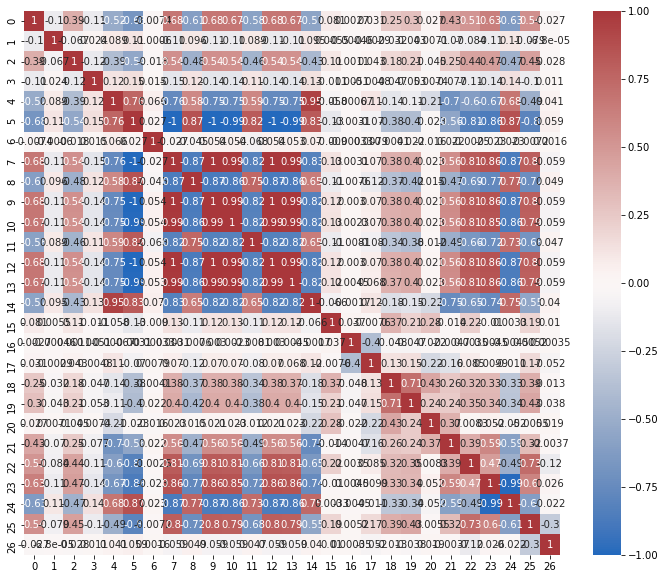

In [4]:
df = pd.DataFrame(X_train)
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='vlag')
plt.show()

#### Feature selection

##### Visuellement

In [16]:
np.unique(X_anomally[:,16])

array([50.])

##### Linéaire

In [5]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")

selector = RFE(estimator, n_features_to_select=20)
selector = selector.fit(X_train, y_train)

In [23]:
selector.ranking_

array([1, 3, 1, 4, 1, 1, 6, 1, 7, 1, 5, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 8, 2])

In [24]:
select_features = np.argsort(selector.ranking_)[:21]
select_features

array([ 0, 25, 24, 23, 22, 21, 20, 19, 18, 17, 15, 14, 13, 11,  9,  7,  5,
        4,  2, 12, 27], dtype=int64)

In [25]:
X_train = X_train[:,select_features]

In [26]:
X_test = X_test[:,select_features]

In [28]:
X_full = np.concatenate((X_train, X_test), axis = 0)

In [ ]:
useful_cols = [17,18,25,19,2,21,20,11,22,8,0, 3,10,24,13,1,15,26, 4]

# Standardisation

#### Standard scaling

In [29]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_full)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

scaler = preprocessing.StandardScaler().fit(X_full)
X_full = scaler.transform(X_full)

print(X_train.shape)
print(X_test.shape)
print(X_full.shape)

(27586, 21)
(27587, 21)
(55173, 21)


#### Robust scaling

In [39]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().fit(X_full)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

scaler = RobustScaler().fit(X_full)
X_full = scaler.transform(X_full)

print(X_train.shape)
print(X_test.shape)
print(X_full.shape)

(27259, 27)
(27587, 27)
(54846, 27)


# Observation des données

#### Observation de la distribution des feature

IndexError: index 10 is out of bounds for axis 1 with size 10

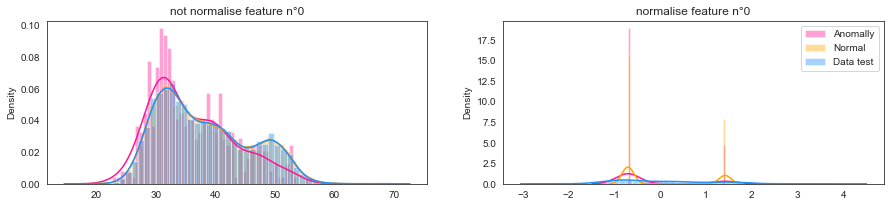

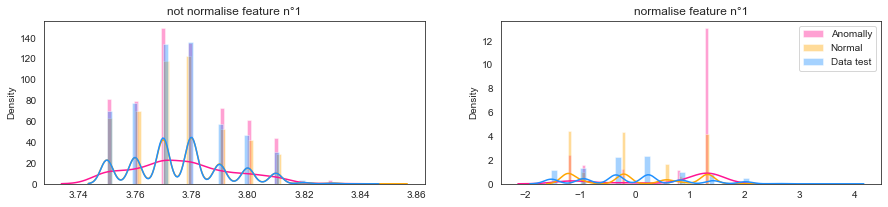

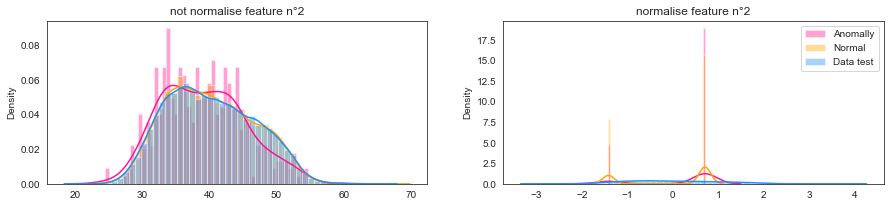

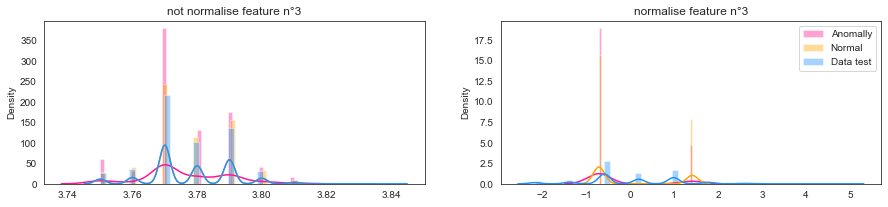

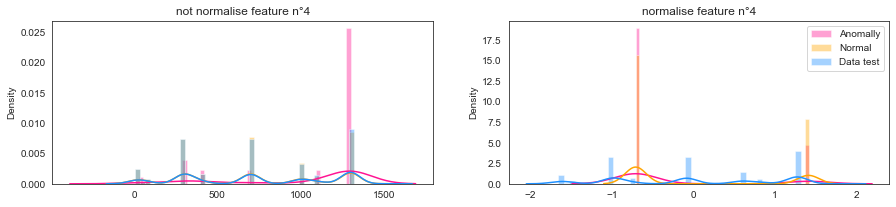

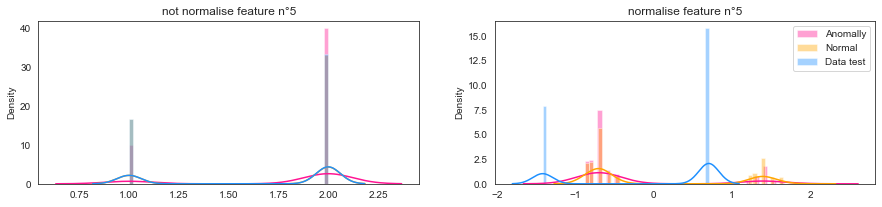

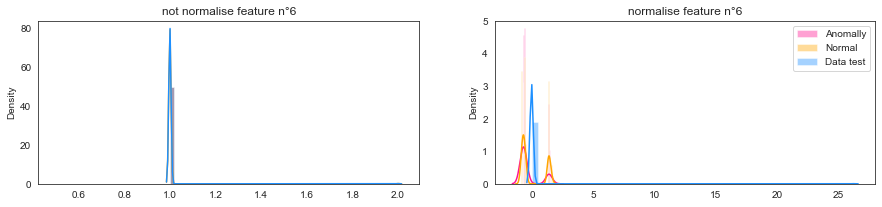

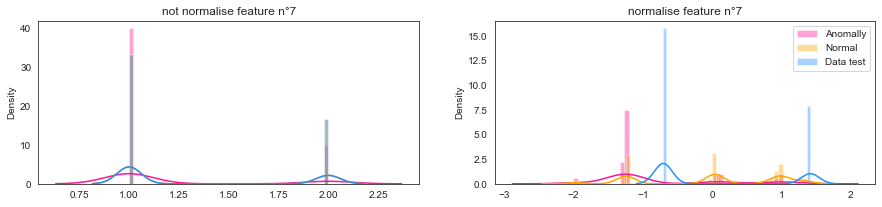

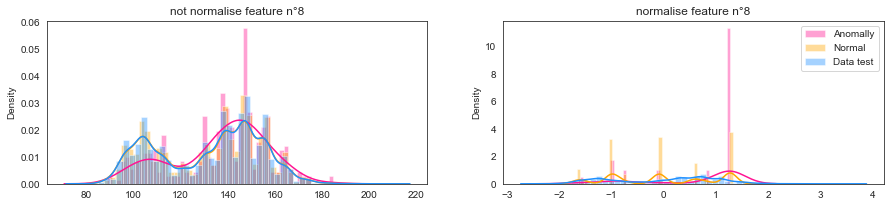

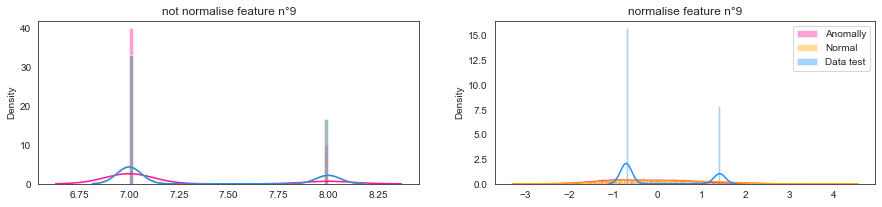

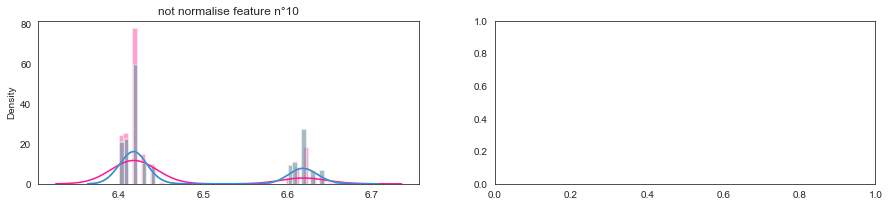

In [26]:
import seaborn as sns
sns.set_style("white")

i = 0
for k in X_test.T :
    fig, axes = plt.subplots(1, 2, figsize=(15, 3))
    bins = 50
    sns.distplot(X_anomally[:,i],ax=axes[0], bins = bins, color="deeppink", label="Anomally")
    sns.distplot(X_normal[:,i],ax=axes[0], bins = bins, color="orange", label="Normal")
    sns.distplot(X_test_full[:,i], ax=axes[0], bins = bins, color="dodgerblue", label="Data test")
    axes[0].set_title("not normalise feature n°" + str(i))
    
    sns.distplot(X_train[index_anomally, i], ax=axes[1], bins = bins, color="deeppink", label="Anomally")
    sns.distplot(X_train[index, i], ax=axes[1], bins = bins, color="orange", label="Normal")
    sns.distplot(k, color="dodgerblue", ax=axes[1], bins = bins, label="Data test")
    axes[1].set_title("normalise feature n°" + str(i))
    
    plt.legend()
    i +=1

In [ ]:
import seaborn as sns
sns.set_style("white")

i = 0
for k in X_test.T :
    fig, axes = plt.subplots(1, 2, figsize=(15, 3))
    bins  =50
    sns.distplot(X_train_full[:,i],ax=axes[0], bins = bins, color="deeppink", label="Data train")
    sns.distplot(X_test_full[:,i], ax=axes[0], bins = bins, color="dodgerblue", label="Data test")
    axes[0].set_title("not normalise feature n°" + str(i))
    
    sns.distplot(X_train[:, i], ax=axes[1], bins = bins, color="deeppink", label="Data train")
    sns.distplot(k, ax=axes[1], bins = bins, color="dodgerblue", label="Data test")
    axes[1].set_title("normalise feature n°" + str(i))
    
    plt.legend()
    i +=1


#### PCA

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt
from sklearn import decomposition

centers = [[1, 1], [-1, -1], [1, -1]]

X = X_train
y_train = y_train.ravel()
y = y_train

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)


ax.text3D(X_normal[:, 0].mean(),
          X_normal[:, 1].mean() + 1.5,
          X_normal[:, 2].mean(), 'Normal',
          horizontalalignment='center',
          bbox=dict(alpha=.5, edgecolor='b', facecolor='b'))

ax.text3D(X_anomally[:, 0].mean(),
          X_anomally[:, 1].mean() + 1.5,
          X_anomally[:, 2].mean(), 'Anomally',
          horizontalalignment='center',
          bbox=dict(alpha=.5, edgecolor='r', facecolor='r'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X_normal[:, 0], X_normal[:, 1], X_normal[:, 2], c=ytrain[ytrain['Anomaly']==0], cmap=plt.cm.nipy_spectral,
           edgecolor='b', s=1)
ax.scatter(X_anomally[:, 0], X_anomally[:, 1], X_anomally[:, 2], c=ytrain[ytrain['Anomaly']==1], cmap=plt.cm.nipy_spectral,
           edgecolor='r', s = 300)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

#### Kernel PCA

In [15]:
from sklearn.decomposition import KernelPCA
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt
from sklearn import decomposition
centers = [[1, 1], [-1, -1], [1, -1]]

X = X_train
y_train = y_train.ravel()
y = y_train

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.KernelPCA(n_components=3, kernel='sigmoid', degree = 5)
pca.fit(X[:1000])
X = pca.transform(X[:1000])


ax.text3D(X_normal[:, 0].mean(),
          X_normal[:, 1].mean() + 1.5,
          X_normal[:, 2].mean(), 'Normal',
          horizontalalignment='center',
          bbox=dict(alpha=.5, edgecolor='b', facecolor='b'))

ax.text3D(X_anomally[:, 0].mean(),
          X_anomally[:, 1].mean() + 1.5,
          X_anomally[:, 2].mean(), 'Anomally',
          horizontalalignment='center',
          bbox=dict(alpha=.5, edgecolor='r', facecolor='r'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X_normal[:, 0], X_normal[:, 1], X_normal[:, 2], c=ytrain[ytrain['Anomaly']==0], cmap=plt.cm.nipy_spectral,
           edgecolor='b', s=1)
ax.scatter(X_anomally[:, 0], X_anomally[:, 1], X_anomally[:, 2], c=ytrain[ytrain['Anomaly']==1], cmap=plt.cm.nipy_spectral,
           edgecolor='r', s = 300)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

# Suppression des outlier sur les données de test normales

# IQR

In [4]:
import numpy as np

IQR = []
for column in X_normal.T :
    Q1 = np.quantile(column,0.25)
    Q3 = np.quantile(column,0.75)
    IQR.append((Q1 - 1.5*(Q3 - Q1), Q3 + 1.5*(Q3 - Q1)))

idx = []
index = 0
for line in X_normal :
    k = 0
    for feature in line :
        if feature < IQR[k][0] or feature > IQR[k][1] :
            idx.append(index)
            break
        k+=1
    index +=1
print(len(idx)/len(X_normal))

X_train = np.concatenate((np.delete(X_normal, idx, 0), X_anomally), axis=0)
y_train = np.concatenate((np.delete(y_normal, idx, 0), y_anomally), axis=0)

0.17063919979176737


#### Suppression des outlier Mahalanobis

In [35]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data, axis=0)
    if not cov:
        cov = np.cov(data,rowvar=False)
        #la matrice de covariance n'est pas inversible. J'utilise donc la pseudo inverse 
    inv_covmat = np.linalg.pinv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [49]:
X_Mahala = mahalanobis(x=X_normal, data=X_normal)
X_Mahala

array([17.39642884, 17.40367956, 14.4144103 , ..., 10.52141352,
       16.29219885, 21.05589838])

In [50]:
len(np.nonzero(X_Mahala > 30)[0])/ len(X_Mahala)

0.14561410032350425

In [52]:
idx = []
index = 0
for dist in X_Mahala :
    if dist > 30 :
        idx.append(index)
    index +=1
X_train = np.concatenate((np.delete(X_normal, idx, 0), X_anomally), axis=0)
y_train = np.concatenate((np.delete(y_normal, idx, 0), y_anomally), axis=0)

# Resampling

#### Combination of over and under resampling

In [13]:
from imblearn.combine import SMOTEENN 

sme = SMOTEENN()
X_train_re, y_train_re = sme.fit_resample(X_train, y_train)

In [13]:
from imblearn.combine import SMOTETomek 

sme = SMOTETomek()
X_train_re, y_train_re = sme.fit_resample(X_train, y_train)

# Split train test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=True)

# Paramètres utiles

In [44]:
contamination = np.count_nonzero(y_train == 1) / len(y_train)
contamination

0.013738303876429526

# Modèles

In [40]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
from sklearn import linear_model

clf = linear_model.BayesianRidge()
clf.fit(X_train, y_train)

BayesianRidge()

In [18]:
from pyod.models.xgbod import XGBOD
from pyod.models.ocsvm import OCSVM
from pyod.models.iforest import IForest
from pyod.models.hbos import HBOS
from pyod.models.copod import COPOD
from pyod.models.abod import ABOD

clf1 = OCSVM(kernel='poly', degree=5, gamma='scale', coef0=0.0, tol=0.001, nu=0.9, 
            shrinking=True, cache_size=200, verbose=False, max_iter=- 1, contamination=contamination)


clf2 = IForest(n_estimators=50, max_samples='auto', contamination=contamination, max_features=1.0, 
        bootstrap=False, n_jobs=1, behaviour='old', random_state=None, verbose=0)


clf3 = HBOS(n_bins=5, alpha=0.1, tol=0.5, contamination=contamination)


clf4 = COPOD(contamination = contamination)


# clf5 = ABOD(contamination = contamination, n_neighbors=10, method='fast')


estimator_list = [clf1, clf2, clf3, clf4, clf5]
clf = XGBOD(estimator_list=estimator_list, standardization_flag_list=None, max_depth=2, learning_rate=0.1, 
            n_estimators=200, silent=True, objective='binary:logistic', booster='gbtree', n_jobs=1, 
            nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, 
            colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.65, 
            missing=None)
clf.fit(X_train, y_train)

AttributeError: BayesianRidge() is not a detector instance.

In [14]:
# from sklearn.cluster import SpectralClustering

# clustering = SpectralClustering(n_clusters=2, assign_labels="discretize", random_state=0).fit(X_val)

[04:37:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [29]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

clf = XGBClassifier()

parameters = {'booster':['gbtree', 'dart'], 'eta':[0.05, 0.1, 0.3], 'gamma' : [0, 1], 'max_depth':[3, 6],
              'max_delta_step' : [0,1,10]}
gs = GridSearchCV(clf, parameters, scoring='roc_auc', cv=5)
gs.fit(X_train, y_train)

[23:02:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:02:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:03:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:03:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:04:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:05:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:05:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:07:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:07:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:07:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:08:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:09:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [30]:
best_param = gs.cv_results_
best_param

{'mean_fit_time': array([0.67838416, 0.95145402, 0.49886489, 0.9929431 , 0.5391572 ,
        0.87645512, 0.49587274, 1.12082005, 0.42586284, 1.04980278,
        0.62612433, 0.99793048, 0.5178143 , 1.04460483, 0.56349249,
        0.91016502, 0.5028542 , 0.87066994, 0.57865067, 1.36155629,
        0.57346539, 0.81741295, 0.50923691, 1.0368259 , 0.57167068,
        0.90019164, 0.51302752, 1.0721334 , 0.49487581, 0.83297129,
        0.46914482, 0.96282425, 0.67259998, 0.78988624, 0.47034178,
        0.77971358, 1.29074655, 2.19193645, 1.15810132, 1.60011907,
        1.2909461 , 1.77405367, 1.08828754, 1.59732594, 0.8391551 ,
        1.32585254, 1.07292891, 1.6980567 , 1.2141511 , 2.36008587,
        1.13935132, 2.07664433, 1.26840658, 2.31460676, 1.17006917,
        1.99925151, 1.0170785 , 1.81933193, 1.1080359 , 2.03116474,
        1.39546609, 2.58947144, 1.38090601, 2.52484484, 1.612884  ,
        2.54618831, 0.92452574, 1.55503869, 1.0400178 , 1.506569  ,
        1.07592134, 1.57957425]

In [31]:
gs.best_params_

{'booster': 'gbtree',
 'eta': 0.05,
 'gamma': 1,
 'max_delta_step': 1,
 'max_depth': 3}

In [32]:
gs.best_score_

0.7523319660515182

In [4]:
from xgboost import XGBClassifier

clf = XGBClassifier(booster = 'gbtree', max_depth = 4)
clf.fit(X_train, y_train)

[23:39:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
clf2 = XGBClassifier(scale_pos_weight = 1/contamination)

In [38]:
parameters = {'sampling_method' :['uniform', 'gradient_based'], 'alpha' :[0,1] }
gs2 = GridSearchCV(clf2, parameters, scoring='roc_auc', cv=5)
gs2.fit(X_train, y_train)

[14:30:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=39.80663780663781,
                                     subsample=None, tree

In [39]:
best_param = gs2.cv_results_
best_param

{'mean_fit_time': array([2.66367207, 2.5769062 , 2.59246521, 2.67723932]),
 'std_fit_time': array([0.22703648, 0.19767021, 0.08118449, 0.19825889]),
 'mean_score_time': array([0.01974783, 0.01675515, 0.01635828, 0.01874914]),
 'std_score_time': array([0.00324137, 0.00132285, 0.00049065, 0.00317608]),
 'param_alpha': masked_array(data=[0, 0, 1, 1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_sampling_method': masked_array(data=['uniform', 'gradient_based', 'uniform',
                    'gradient_based'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0, 'sampling_method': 'uniform'},
  {'alpha': 0, 'sampling_method': 'gradient_based'},
  {'alpha': 1, 'sampling_method': 'uniform'},
  {'alpha': 1, 'sampling_method': 'gradient_based'}],
 'split0_test_score': array([0.71558526, 0.71558526, 0.70511154, 0.70511154]),
 'split1_test_score': array([0.75299

In [46]:
gs2.best_score_

0.7396712095647346

In [46]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.cluster import SpectralClustering
X_train_reduce = np.concatenate((X_train[:,16].reshape(-1,1), X_train[:,20].reshape(-1,1)), axis = 1)
clf = SpectralClustering(n_clusters=2,assign_labels="discretize")
clf.fit(X_train_reduce)

In [32]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(bagging_fraction=0.5, boosting='goss', boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.03, max_depth=3,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=80, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
               verbose=-1)
clf.fit(X_train, y_train)

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5


LGBMClassifier(bagging_fraction=0.5, boosting='goss', feature_fraction=0.4,
               learning_rate=0.03, max_depth=3, num_leaves=80,
               objective='binary', verbose=-1)

In [10]:
contamination = np.count_nonzero(y_train == 1) / len(y_train)
contamination

0.02512143841078808

In [30]:
from pyod.models.xgbod import XGBOD
from pyod.models.ocsvm import OCSVM
from pyod.models.iforest import IForest
from pyod.models.hbos import HBOS
from pyod.models.copod import COPOD
from pyod.models.abod import ABOD

clf1 = OCSVM(kernel='poly', degree=5, gamma='scale', coef0=0.0, tol=0.001, nu=0.8, 
            shrinking=True, cache_size=200, verbose=False, max_iter=- 1, contamination=contamination)


clf2 = IForest(n_estimators=50, max_samples='auto', contamination=contamination, max_features=1.0, 
        bootstrap=False, n_jobs=1, behaviour='old', random_state=None, verbose=0)


clf3 = HBOS(n_bins=5, alpha=0.1, tol=0.5, contamination=contamination)


clf4 = COPOD(contamination = contamination)


# clf5 = ABOD(contamination = contamination, n_neighbors=10, method='fast')


estimator_list = [clf1, clf2, clf3, clf4]
clf = XGBOD(estimator_list=estimator_list, standardization_flag_list=None, max_depth=3, learning_rate=0.1, 
            n_estimators=100, silent=True, objective='binary:logistic', booster='gbtree', n_jobs=1, 
            nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, 
            colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.65, 
            missing=None)
clf.fit(X_train, y_train)

[02:34:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:34:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBOD(base_score=0.65, booster='gbtree', colsample_bylevel=1,
   colsample_bytree=1,
   estimator_list=[OCSVM(cache_size=200, coef0=0.0, contamination=0.02512143841078808, degree=5,
   gamma='scale', kernel='poly', max_iter=-1, nu=0.8, shrinking=True,
   tol=0.001, verbose=False), IForest(behaviour='old', bootstrap=False, contamination=0.02512143841078808,
    max_features=1.0, max_samples='auto', n_estimators=50, n_jobs=1,
    random_state=None, verbose=0), HBOS(alpha=0.1, contamination=0.02512143841078808, n_bins=5, tol=0.5), COPOD(contamination=0.02512143841078808)],
   gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
   min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
   nthread=None, objective='binary:logistic', random_state=0, reg_alpha=0,
   reg_lambda=1, scale_pos_weight=1, silent=True,
   standardization_flag_list=[True, True, True, True], subsample=1)

# Calcul des performance

#### AUC et ROC

In [18]:
from sklearn.metrics import roc_auc_score
decif = clf.predict(X_train)
roc_auc_score(y_train, decif)

0.6488079878739157

In [19]:
import matplotlib.pyplot as plt  
from sklearn import metrics

metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()

NameError: name 'y_test' is not defined

#### Cross validation (peut être longye en fonction du modèle)

In [32]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X_train_full, y_train_full,scoring='roc_auc', cv=5)

array([0.73427855, 0.76376763, 0.73641478, 0.77018164, 0.75164213])

#### Confusion matrix

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, clf.predict(X_val))
sns.heatmap(cm, annot=True)

NameError: name 'y_val' is not defined

# Import score leaderboard

In [94]:
decif = clf.decision_function(X_test)
np.savetxt('ytest_challenge_student.csv', decif, fmt = '%1.6f', delimiter=',')

AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

In [45]:
decif = clf.predict_proba(X_test)


np.savetxt('ytest_challenge_student.csv', decif[:,1], fmt = '%1.6f', delimiter=',')

In [44]:
decif.shape

(2,)

# Sources

Remove outilier in a dataset : https://kanoki.org/2020/04/23/how-to-remove-outliers-in-python/